In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [317]:
os.chdir('C:/Storage/StudyJourney/Nam3/Cs114/Project2/PredictScores')

In [318]:
# Đọc dữ liệu
annonimized = pd.read_csv("Dataset/annonimized.csv")
tbtl = pd.read_excel("Dataset/public_it001/tbtl-public.ods", engine='odf')
th = pd.read_csv("Dataset/public_it001/th-public.csv")
qt = pd.read_csv("Dataset/public_it001/qt-public.csv")
CK = pd.read_csv("Dataset/public_it001/ck-public.csv")

## Xử lý dữ liệu annonimized

In [319]:
annonimized

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10/9/2025 8:02,10/9/2025 8:06,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10/9/2025 8:04,10/9/2025 8:04,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 8:06,10/9/2025 8:06,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 8:47,10/9/2025 8:48,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 9:19,10/9/2025 9:19,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:03,1/15/2025 16:03,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,1/15/2025 16:04,1/15/2025 16:05,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:04,1/15/2025 16:05,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:05,1/15/2025 16:05,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0..."


In [320]:
print(annonimized['status'].unique())

['SCORE' 'Compilation Error' 'pending' 'Syntax Error']


In [321]:
import json

def extract_judgement_features(df):
    # Parse cột judgement thành dict với kiểm tra ngoại lệ
    def safe_json_loads(j):
        try:
            return json.loads(j) if isinstance(j, str) else {}
        except json.JSONDecodeError:
            return {}

    # Chuyển cột judgement sang dạng dict
    df['judgement_parsed'] = df['judgement'].apply(safe_json_loads)

    # Kiểm tra kiểu của verdicts và xử lý
    def extract_verdicts(verdicts):
        if isinstance(verdicts, dict):
            return verdicts.get('WRONG', 0)  # Trả về số test case sai
        return 0  # Nếu không phải dict, mặc định là không có lỗi

    df['verdicts'] = df['judgement_parsed'].apply(lambda x: x.get('verdicts', {}) if isinstance(x, dict) else {})
    # Số test case sai (nếu có)
    df['wrong_testcases'] = df['verdicts'].apply(extract_verdicts)

    return df


In [322]:
from datetime import datetime

# Hàm chuyển đổi thời gian với ngày tham chiếu
reference_date = datetime(2024, 1, 1)

# Chuyển đổi 'created_at' và 'updated_at' thành ordinal
annonimized['created_at'] = pd.to_datetime(annonimized['created_at'], errors='coerce')
annonimized['updated_at'] = pd.to_datetime(annonimized['updated_at'], errors='coerce')
annonimized['created_at_ordinal'] = (annonimized['created_at'] - reference_date).dt.days
annonimized['updated_at_ordinal'] = (annonimized['updated_at'] - reference_date).dt.days

# Đặc trưng hoạt động theo giờ
annonimized['hour'] = annonimized['created_at'].dt.hour
hourly_activity = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['hour'].value_counts().unstack(fill_value=0).reset_index()
annonimized['submission_time_diff'] = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['created_at'].diff().dt.total_seconds()

# Label encoding cho cột 'status'
label_encoder = LabelEncoder()

# Thêm các đặc trưng tổng hợp
annonimized['status_encoded'] = label_encoder.fit_transform(annonimized['status'])
## Đếm status 'SCORE'
annonimized['score_status'] = annonimized['status'].apply(lambda x: 1 if x == 'SCORE' else 0)

annonimized['duplicate_count'] = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['is_final'].transform('count')

## Tính điểm trung bình và điểm trung bình trên mỗi lần nộp
annonimized['avg_pre_score'] = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['pre_score'].transform('mean')
annonimized['score_per_submission'] = annonimized['avg_pre_score'] / (annonimized['duplicate_count'] + 1e-5)  # Tránh chia cho 0
## Tính tỉ lệ hoàn
annonimized['is_final'] = annonimized.groupby(
    ['username', 'assignment_id', 'problem_id'])['is_final'].transform(lambda x: (x == 1))
annonimized['is_final_ratio'] = annonimized['is_final'] / annonimized['duplicate_count']

annonimized = extract_judgement_features(annonimized)

annonimized = annonimized.groupby(['username']).agg({
    'created_at_ordinal': 'mean',
    'updated_at_ordinal': 'mean',
    'hour': 'mean',
    'submission_time_diff': 'mean',
    'status_encoded': 'mean',
    'score_status': 'count',
    'avg_pre_score': 'mean',
    'score_per_submission': 'mean',
    'duplicate_count': 'mean',
    'is_final': 'mean',
    'is_final_ratio': 'mean',
    'wrong_testcases': 'mean',
}).reset_index()

# Nhóm và tổng hợp các đặc trưng
features = ['username','created_at_ordinal', 'updated_at_ordinal', 'hour', 'submission_time_diff',
            'status_encoded', 'score_status', 'avg_pre_score', 'score_per_submission',
            'duplicate_count', 'is_final', 'is_final_ratio', 'wrong_testcases']

features_nouser = ['created_at_ordinal', 'updated_at_ordinal', 'hour', 'submission_time_diff',
                   'status_encoded', 'score_status', 'avg_pre_score', 'score_per_submission',
                   'duplicate_count', 'is_final', 'is_final_ratio', 'wrong_testcases']


annonimized = annonimized[features]


In [323]:
print(annonimized.dtypes)

username                 object
created_at_ordinal      float64
updated_at_ordinal      float64
hour                    float64
submission_time_diff    float64
status_encoded          float64
score_status              int64
avg_pre_score           float64
score_per_submission    float64
duplicate_count         float64
is_final                float64
is_final_ratio          float64
wrong_testcases         float64
dtype: object


In [324]:
annonimized

,username,created_at_ordinal,updated_at_ordinal,hour,submission_time_diff,status_encoded,score_status,avg_pre_score,score_per_submission,duplicate_count,is_final,is_final_ratio,wrong_testcases
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,578.557823,578.646259,4.401361,11078.400000,0.809524,147,5504.149660,2259.713951,5.136054,0.312925,0.176385,3.006803
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,610.610039,607.899614,10.525097,-318927.182320,0.806950,259,5488.552124,2123.820551,6.158301,0.301158,0.164760,1.918919
2,01122b3ef7e59b84189e65985305f575d6bdf83c,647.066667,645.871795,10.964103,-158156.692913,0.897436,195,5973.753846,2763.648500,9.328205,0.343590,0.254971,4.615385
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,485.800000,485.820000,8.610000,2893.584906,0.760000,100,5952.760000,3822.479276,4.160000,0.470000,0.342854,1.640000
4,013de369c439ab0ead8aa7da64423aa395a8be39,616.336449,616.336449,8.598131,1628.780488,0.878505,107,6474.448598,5097.940025,2.794393,0.616822,0.514123,1.691589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,527.918919,527.918919,9.351351,2779.500000,0.959459,74,5581.081081,3623.092731,3.783784,0.459459,0.330556,0.432432
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,559.823077,559.923077,7.046154,20111.868132,0.830769,260,6204.557692,2311.415284,7.384615,0.300000,0.187174,2.430769
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,613.553776,612.260870,11.080092,-161812.095808,0.823799,437,4998.466819,1645.928413,12.643021,0.235698,0.139189,3.073227
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,615.521277,615.627660,10.691489,15149.000000,0.787234,94,4343.329787,2249.761646,4.808511,0.361702,0.219710,4.212766


In [325]:
# Huấn luyện và đánh giá mô hình
models = {
    'LinearRegression': LinearRegression(),
    # 'RandomForest': RandomForestRegressor(random_state=42),
    # 'lgbm': LGBMRegressor(random_state=42),
    # 'hist_gbr': HistGradientBoostingRegressor(random_state=42),
}

## data TBTL

In [326]:
# Merge dữ liệu bằng username từ annonimized và tbtl
data_tbtl = annonimized.merge(tbtl, on="username", how="left")

In [327]:
data_tbtl

,username,created_at_ordinal,updated_at_ordinal,hour,submission_time_diff,status_encoded,score_status,avg_pre_score,score_per_submission,duplicate_count,is_final,is_final_ratio,wrong_testcases,TBTL
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,578.557823,578.646259,4.401361,11078.400000,0.809524,147,5504.149660,2259.713951,5.136054,0.312925,0.176385,3.006803,7.24
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,610.610039,607.899614,10.525097,-318927.182320,0.806950,259,5488.552124,2123.820551,6.158301,0.301158,0.164760,1.918919,8.11
2,01122b3ef7e59b84189e65985305f575d6bdf83c,647.066667,645.871795,10.964103,-158156.692913,0.897436,195,5973.753846,2763.648500,9.328205,0.343590,0.254971,4.615385,7.30
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,485.800000,485.820000,8.610000,2893.584906,0.760000,100,5952.760000,3822.479276,4.160000,0.470000,0.342854,1.640000,8.63
4,013de369c439ab0ead8aa7da64423aa395a8be39,616.336449,616.336449,8.598131,1628.780488,0.878505,107,6474.448598,5097.940025,2.794393,0.616822,0.514123,1.691589,8.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,527.918919,527.918919,9.351351,2779.500000,0.959459,74,5581.081081,3623.092731,3.783784,0.459459,0.330556,0.432432,NaN
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,559.823077,559.923077,7.046154,20111.868132,0.830769,260,6204.557692,2311.415284,7.384615,0.300000,0.187174,2.430769,NaN
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,613.553776,612.260870,11.080092,-161812.095808,0.823799,437,4998.466819,1645.928413,12.643021,0.235698,0.139189,3.073227,NaN
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,615.521277,615.627660,10.691489,15149.000000,0.787234,94,4343.329787,2249.761646,4.808511,0.361702,0.219710,4.212766,NaN


In [328]:
# Phân tách dữ liệu
train_test_data_tbtl = data_tbtl[data_tbtl['TBTL'].notna()]  # Sinh viên có điểm dùng để train
predict_data_tbtl = data_tbtl[data_tbtl['TBTL'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_tbtl.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_tbtl.shape[0]}")

Số lượng sinh viên có điểm (train): 799
Số lượng sinh viên cần dự đoán: 690


### Train test data tbtl

In [329]:
X_train_test_data_tbtl = train_test_data_tbtl[features_nouser]
y_train_test_data_tbtl = train_test_data_tbtl['TBTL']

In [330]:
nan_columns = X_train_test_data_tbtl.columns[X_train_test_data_tbtl.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_tbtl.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_tbtl[nan_columns] = X_train_test_data_tbtl[nan_columns].fillna(X_train_test_data_tbtl[nan_columns].mean())

Các cột chứa NaN: ['submission_time_diff']
Số lượng NaN trong mỗi cột:
submission_time_diff    13
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\807125407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_test_data_tbtl[nan_columns] = X_train_test_data_tbtl[nan_columns].fillna(X_train_test_data_tbtl[nan_columns].mean())


In [331]:
X_train_test_data_tbtl

,created_at_ordinal,updated_at_ordinal,hour,submission_time_diff,status_encoded,score_status,avg_pre_score,score_per_submission,duplicate_count,is_final,is_final_ratio,wrong_testcases
0,578.557823,578.646259,4.401361,11078.400000,0.809524,147,5504.149660,2259.713951,5.136054,0.312925,0.176385,3.006803
1,610.610039,607.899614,10.525097,-318927.182320,0.806950,259,5488.552124,2123.820551,6.158301,0.301158,0.164760,1.918919
2,647.066667,645.871795,10.964103,-158156.692913,0.897436,195,5973.753846,2763.648500,9.328205,0.343590,0.254971,4.615385
3,485.800000,485.820000,8.610000,2893.584906,0.760000,100,5952.760000,3822.479276,4.160000,0.470000,0.342854,1.640000
4,616.336449,616.336449,8.598131,1628.780488,0.878505,107,6474.448598,5097.940025,2.794393,0.616822,0.514123,1.691589
...,...,...,...,...,...,...,...,...,...,...,...,...
796,669.531532,669.819820,10.063063,45215.454545,0.729730,111,5171.639640,2932.435515,4.135135,0.396396,0.260446,2.225225
797,659.291317,657.952381,10.151261,-143934.782609,0.711485,357,4785.224090,1948.548533,6.394958,0.291317,0.163801,2.316527
798,647.670968,648.206452,8.225806,69698.235294,0.754839,155,4247.296774,2404.215664,8.819355,0.341935,0.251647,3.206452
799,653.673250,653.116697,7.561939,-59003.484163,0.746858,557,4278.605027,1188.863063,10.188510,0.206463,0.094369,3.427289


In [332]:
# Lấy tên các đặc trưng
features = X_train_test_data_tbtl.columns

#Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_test_data_tbtl = scaler.fit_transform(X_train_test_data_tbtl)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_tbtl, y_train_test_data_tbtl, test_size=0.3, random_state=42)

In [333]:
X_train

array([[ 1.00375426,  1.01770879, -0.30407458, ...,  0.29366252,
         0.20418894, -0.44121512],
       [ 0.39880424,  0.40809595,  0.89000499, ..., -0.20421676,
        -0.24460075, -0.28628951],
       [-0.16072248, -0.15069626,  0.68751347, ...,  0.74931003,
         0.53975014,  0.43798122],
       ...,
       [ 0.08187844,  0.08107589,  0.28158924, ..., -0.70014283,
        -0.54566837,  0.12750814],
       [ 0.88958086,  0.89989004,  0.33228944, ..., -1.09430718,
        -1.04928553,  0.76225413],
       [ 1.11248636,  1.12230697, -0.30739115, ..., -0.17845385,
        -0.30274264,  0.06270986]])

In [334]:
y_train 

405    7.71
523    7.50
750    7.74
427    8.04
41     8.63
       ... 
71     7.11
106    7.93
270    9.15
436    7.32
102    8.10
Name: TBTL, Length: 559, dtype: float64

In [335]:

metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

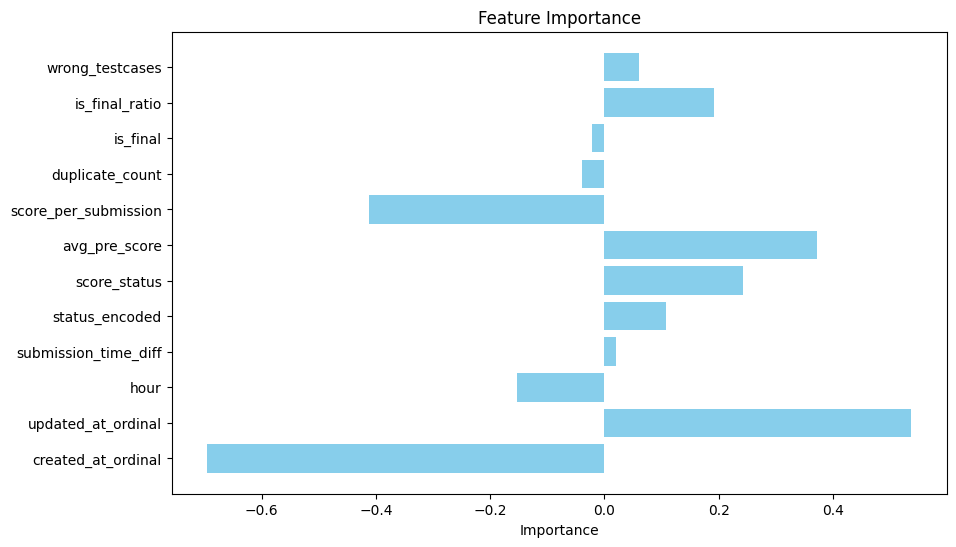

In [336]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [337]:
# In kết quả
print("Model Evaluation Results of TBTL:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of TBTL:
LinearRegression: MSE=0.6761, R2=0.1401


### Predict data tbtl

In [338]:
X_predict_data_tbtl = predict_data_tbtl[features_nouser]

In [339]:
nan_columns = X_predict_data_tbtl.columns[X_predict_data_tbtl.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_tbtl.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_tbtl[nan_columns] = X_predict_data_tbtl[nan_columns].fillna(X_predict_data_tbtl[nan_columns].mean())

Các cột chứa NaN: ['submission_time_diff']
Số lượng NaN trong mỗi cột:
submission_time_diff    7
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\928285070.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict_data_tbtl[nan_columns] = X_predict_data_tbtl[nan_columns].fillna(X_predict_data_tbtl[nan_columns].mean())


In [340]:
X_predict_data_tbtl = scaler.fit_transform(X_predict_data_tbtl)

In [341]:
# Dự đoán
predict_data_tbtl['TBTL'] = model.predict(X_predict_data_tbtl)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\3950690568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_tbtl['TBTL'] = model.predict(X_predict_data_tbtl)


In [342]:

output = predict_data_tbtl[['username', 'TBTL']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_tbtl.csv", index=False, header=False)

## data TH


In [343]:
# Merge dữ liệu bằng username từ annonimized và th
data_th = annonimized.merge(th, on="username", how="left")

In [344]:
data_th['TH'] = pd.to_numeric(data_th['TH'], errors='coerce')

In [345]:
# Phân tách dữ liệu
train_test_data_th = data_th[data_th['TH'].notna()]  # Sinh viên có điểm dùng để train
predict_data_th = data_th[data_th['TH'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_th.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_th.shape[0]}")

Số lượng sinh viên có điểm (train): 753
Số lượng sinh viên cần dự đoán: 736


### Train test data th

In [346]:
X_train_test_data_th = train_test_data_th[features_nouser]
y_train_test_data_th = train_test_data_th['TH']

In [347]:
nan_columns = X_train_test_data_th.columns[X_train_test_data_th.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_th.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_th[nan_columns] = X_train_test_data_th[nan_columns].fillna(X_train_test_data_th[nan_columns].mean())

Các cột chứa NaN: ['submission_time_diff']
Số lượng NaN trong mỗi cột:
submission_time_diff    13
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\2751891394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_test_data_th[nan_columns] = X_train_test_data_th[nan_columns].fillna(X_train_test_data_th[nan_columns].mean())


In [348]:
# Lấy tên các đặc trưng
features = X_train_test_data_th.columns

#Chuẩn hóa dữ liệu
X_train_test_data_th = scaler.fit_transform(X_train_test_data_th)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_th, y_train_test_data_th, test_size=0.3, random_state=42)

In [349]:
# Huấn luyện và đánh giá mô hình
metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

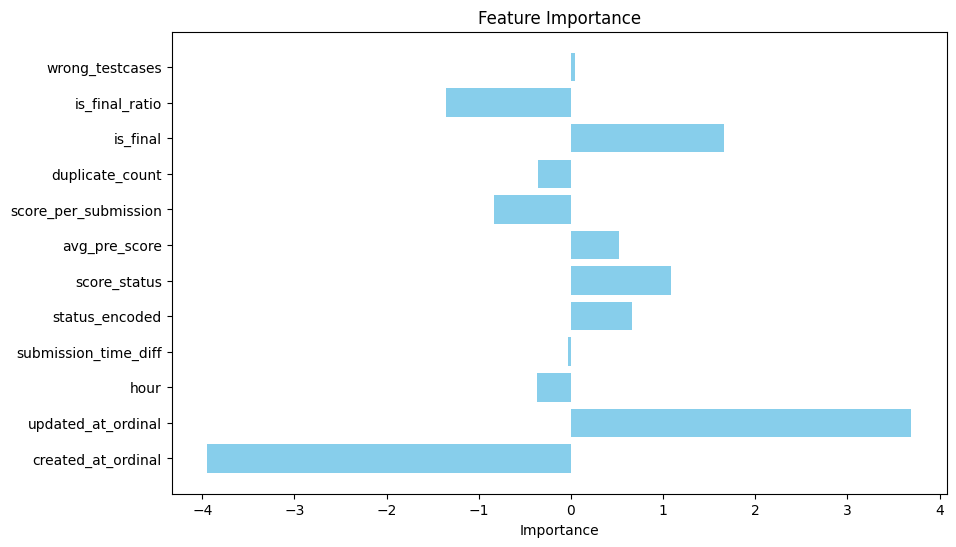

In [350]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [351]:
# In kết quả
print("Model Evaluation Results of TH:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of TH:
LinearRegression: MSE=3.1266, R2=0.3735


### Predict data th

In [352]:
X_predict_data_th = predict_data_th[features_nouser]

In [353]:
nan_columns = X_predict_data_th.columns[X_predict_data_th.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_th.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_th[nan_columns] = X_predict_data_th[nan_columns].fillna(X_predict_data_th[nan_columns].mean())

Các cột chứa NaN: ['submission_time_diff']
Số lượng NaN trong mỗi cột:
submission_time_diff    7
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\1144068623.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict_data_th[nan_columns] = X_predict_data_th[nan_columns].fillna(X_predict_data_th[nan_columns].mean())


In [354]:
X_predict_data_th = scaler.transform(X_predict_data_th)

In [355]:
# Dự đoán
predict_data_th['TH'] = model.predict(X_predict_data_th)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\1421566909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_th['TH'] = model.predict(X_predict_data_th)


In [356]:

output = predict_data_th[['username', 'TH']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_th.csv", index=False, header=False)

## data QT

In [357]:
# Merge dữ liệu bằng username từ annonimized và qt
data_qt = annonimized.merge(qt, on="username", how="left")

In [358]:
data_qt['QT'] = pd.to_numeric(data_qt['QT'], errors='coerce')

In [359]:
# Phân tách dữ liệu
train_test_data_qt = data_qt[data_qt['QT'].notna()]  # Sinh viên có điểm dùng để train
predict_data_qt = data_qt[data_qt['QT'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_qt.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_qt.shape[0]}")

Số lượng sinh viên có điểm (train): 754
Số lượng sinh viên cần dự đoán: 735


### Train test data qt

In [360]:
X_train_test_data_qt = train_test_data_qt[features_nouser]
y_train_test_data_qt = train_test_data_qt['QT']

In [361]:
# fill NaN
nan_columns = X_train_test_data_qt.columns[X_train_test_data_qt.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_qt.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_qt[nan_columns] = X_train_test_data_qt[nan_columns].fillna(X_train_test_data_qt[nan_columns].mean())

Các cột chứa NaN: ['submission_time_diff']
Số lượng NaN trong mỗi cột:
submission_time_diff    13
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\2698798050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_test_data_qt[nan_columns] = X_train_test_data_qt[nan_columns].fillna(X_train_test_data_qt[nan_columns].mean())


In [362]:
# Lấy tên các đặc trưng
features = X_train_test_data_qt.columns

#Chuẩn hóa dữ liệu
X_train_test_data_qt = scaler.fit_transform(X_train_test_data_qt)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_qt, y_train_test_data_qt, test_size=0.3, random_state=42)

In [363]:
# Huấn luyện và đánh giá mô hình

metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

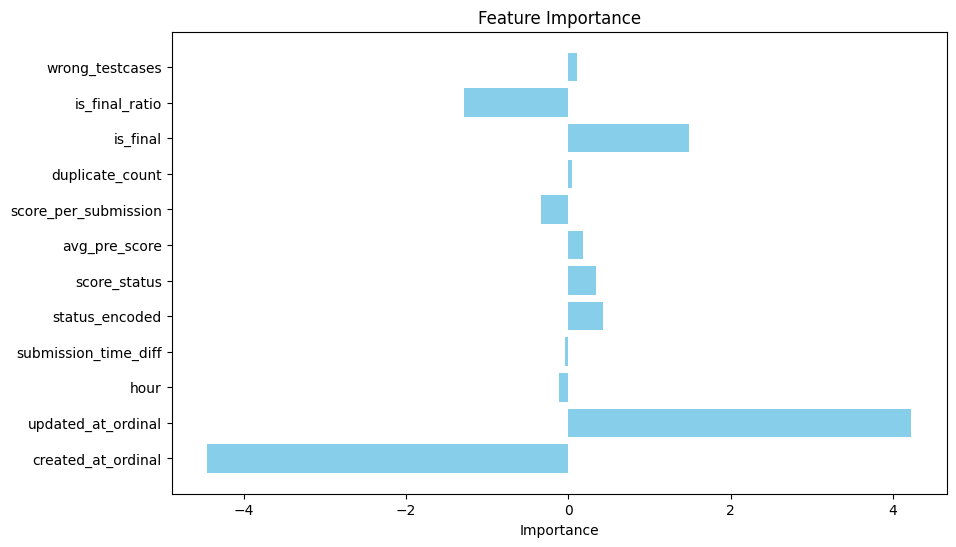

In [364]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [365]:
# In kết quả
print("Model Evaluation Results of QT:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of QT:
LinearRegression: MSE=2.2901, R2=0.0315


### Predict data qt

In [366]:
X_predict_data_qt = predict_data_qt[features_nouser]

In [367]:
nan_columns = X_predict_data_qt.columns[X_predict_data_qt.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_qt.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_qt[nan_columns] = X_predict_data_qt[nan_columns].fillna(X_predict_data_qt[nan_columns].mean())

Các cột chứa NaN: ['submission_time_diff']
Số lượng NaN trong mỗi cột:
submission_time_diff    7
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\2015593243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict_data_qt[nan_columns] = X_predict_data_qt[nan_columns].fillna(X_predict_data_qt[nan_columns].mean())


In [368]:
X_predict_data_qt = scaler.transform(X_predict_data_qt)

In [369]:
# Dự đoán
predict_data_qt['QT'] = model.predict(X_predict_data_qt)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\3031361918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_qt['QT'] = model.predict(X_predict_data_qt)


In [370]:

output = predict_data_qt[['username', 'QT']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_qt.csv", index=False, header=False)

## data CK

In [371]:
# Merge dữ liệu bằng username từ annonimized và ck
data_CK = annonimized.merge(CK, on="username", how="left")

In [372]:
# Phân tách dữ liệu
train_test_data_ck = data_CK[data_CK['CK'].notna()]  # Sinh viên có điểm dùng để train
predict_data_ck = data_CK[data_CK['CK'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_ck.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_ck.shape[0]}")

Số lượng sinh viên có điểm (train): 755
Số lượng sinh viên cần dự đoán: 734


### Train test data ck

In [373]:
X_train_test_data_ck = train_test_data_ck[features_nouser]
y_train_test_data_ck = train_test_data_ck['CK']

In [374]:
nan_columns = X_train_test_data_ck.columns[X_train_test_data_ck.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_ck.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_ck[nan_columns] = X_train_test_data_ck[nan_columns].fillna(X_train_test_data_ck[nan_columns].mean())

Các cột chứa NaN: ['submission_time_diff']
Số lượng NaN trong mỗi cột:
submission_time_diff    13
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\3306873973.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_test_data_ck[nan_columns] = X_train_test_data_ck[nan_columns].fillna(X_train_test_data_ck[nan_columns].mean())


In [375]:
# Lấy tên các đặc trưng
features = X_train_test_data_ck.columns

#Chuẩn hóa dữ liệu
X_train_test_data_ck = scaler.fit_transform(X_train_test_data_ck)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_ck, y_train_test_data_ck, test_size=0.3, random_state=42)

In [376]:
# Huấn luyện và đánh giá mô hình
metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

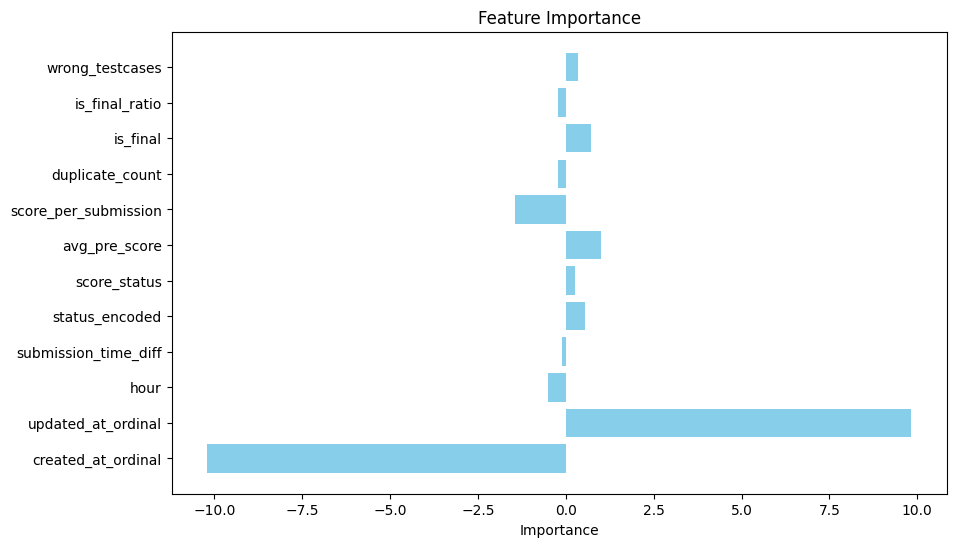

In [377]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [378]:
# In kết quả
print("Model Evaluation Results of CK:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of CK:
LinearRegression: MSE=3.6248, R2=0.2137


### Predict data ck

In [379]:
X_predict_data_ck = predict_data_ck[features_nouser]

In [380]:
nan_columns = X_predict_data_ck.columns[X_predict_data_ck.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_ck.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_ck[nan_columns] = X_predict_data_ck[nan_columns].fillna(X_predict_data_ck[nan_columns].mean())

Các cột chứa NaN: ['submission_time_diff']
Số lượng NaN trong mỗi cột:
submission_time_diff    7
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\2984709394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict_data_ck[nan_columns] = X_predict_data_ck[nan_columns].fillna(X_predict_data_ck[nan_columns].mean())


In [381]:
X_predict_data_ck = scaler.transform(X_predict_data_ck)

In [382]:
# Dự đoán
predict_data_ck['CK'] = model.predict(X_predict_data_ck)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\3428818030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_ck['CK'] = model.predict(X_predict_data_ck)


In [383]:

output = predict_data_ck[['username', 'CK']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_ck.csv", index=False, header=False)